[Accueil](../../index.ipynb) > [Sommaire Première](../index.ipynb)

# 8.3 Algorithmique : k plus proches voisins

## L'apprentissage automatique

L'apprentissage automatique (*Machine Learning*) est une branche de l'intelligence artificielle qui se fonde sur une approche mathématique et statistique afin de permettre aux ordinateurs d'apprendre à partir de données.


On distingue 2 phases:

1. La phase d'**apprentissage** qui consite à alimenter un modèle de données. 
2. La mise en production lors de laquelle de nouvelles données sont soumises et doivent conduire au résultat souhaité.

On distingue différents types d'apprentissages:

- L'apprentissage **supervisé** : dans ce cas les données fournies sont étiquetées. Le système apprend à classer selon une classification
- L'apprentissage **non supervisé** : les données fournies ne pas sont étiquetées. L'algorithme doit découvrir par lui-même la structure des données.
- L'apprentissage **par renforcement** : Un système de récompense/punition en fonction des réponses données permet d'améliorer ses choix. Au début l'algorithme joue au hasard, puis au fur et à mesure utilise ce qu'il a appris pour progresser
- L'apprentissage **par transfert** : utiliser des compétences déjà assimilées sur de nouvelles tâches.



## Principe de l'algorithme des k plus proches voisins

L'algorithme des **k plus proches voisins** est un algorithme très connu dans le milieu de l'intelligence artificiel. Sa popularité tient à sa facilité de compréhension ainsi qu'à sa mise en oeuvre. De plus la précision des résultats obtenus est de même niveau, voire meilleure, que des algorithmes plus complexe.

L'**algorithme des k plus proches voisins** ( *KNN* : *K-Nearest Neighbor* ) est de type **apprentissage supervisé**.

La phase d'apprentissage est très rapide puisqu'elle met en mémoire l'ensemble des données d'entrainement pour les comparer avec les données à traiter. Le principal problème est justement la taille mémoire importante ainsi que la complexité temporelle de la phase de tests.

On dispose d'un ensemble E de n données labélisées $E=\{(y_i, \overrightarrow{x_i})\}$ avec $1 \leq i \leq n$ où 
- $y_i$ est la **classe** (ou label) de la donnée $i$.
- le vecteur $\overrightarrow{x_i}$ représente les **variables** de la donnée $i$.

On considère une donnée $u$ dont on ne connait pas la classe mais dont on dispose des données. on a donc $u = (?, \overrightarrow{x_u})$

On considère également une fonction $d$ qui retourne la **distance** entre u et n'importe quelle donnée appartenant à $E$.

Le principe de l'algorithme knn est le suivant:

- On calcule toutes les distances entre $u$ et les données de $E$;
- On retient les $k$ données de $E$ les plus proches de $u$;
- On attribut à $u$ la classe la plus fréquente parmi les $k$ données. 

<figure>
   <img src="img/knn_schema.png"  alt="principe de l'algorithme knn" title="principe de l'algorithme knn">
   <figcaption>principe de l'algorithme knn</figcaption>
</figure>

**Avec un exemple concret la définition mathméatique précédente sera plus claire...**

Considérons 3 sortes d'Iris:

<table>
   <tr>
       <td>
           <figure>
               <img src="img/setosa.jpg"  alt="Iris Setosa" title="Iris Setosa">
               <figcaption>Iris Setosa</figcaption>
           </figure>
       </td>
       <td>
           <figure>
               <img src="img/versicolor.jpg"  alt="Iris Versicolor" title="Iris Versicolor">
               <figcaption>Iris Versicolor</figcaption>
           </figure>
       </td>
       <td>
           <figure>
               <img src="img/virginica.jpg"  alt="Iris Virginica" title="Iris Virginica">
               <figcaption>Iris Virginica</figcaption>
           </figure>
       </td>
   </tr>
</table>

Le **nom des Iris** est la **classe** (ou le label) d'une donnée.

Notre ensemble $E$ possède donc trois classes:

1. Iris Setosa
2. Iris Versicolor
3. Iris Virginica

Des mesures ont été effectuées sur chaque Iri:

- La longueur du sépale;
- la largeur du sépale;
- la longeur du pétale;
- la largeur du pétale.

Ces données, appelées les [iris de Fischer](https://fr.wikipedia.org/wiki/Iris_de_Fisher) ont été collectées par [Ronal Fischer](https://fr.wikipedia.org/wiki/Ronald_Aylmer_Fisher) (biologiste et statisticien) en 1936 et contiennent 50 échantillons de chacune des trois espèces.

Ces données sont facilement disponibles sur internet et sont souvent utilisées dans un but pédagogique.

In [110]:
import pandas as pd
import urllib

url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
response = urllib.request.urlopen(url)
data = pd.read_csv(response)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Considérons uniquement la première donnée de notre ensemble $E$.

In [111]:
data.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

Cette donnée, qui appartient à l'ensemble $E$, peut s'écrire $(setosa, (5.1, 3.5, 1.4, 0.2))$

Nous disposons 

- d'un ensemble $E$ de 150 données **labélisées** dont le vecteur des variables est de dimension 4.
- d'une donnée non labélisée dont le vecteur des variables est connu.

Le vecteur des variables est de dimension 4

Commençons par utiliser 2 diagrammes en deux dimensions pour se représenter ces données.

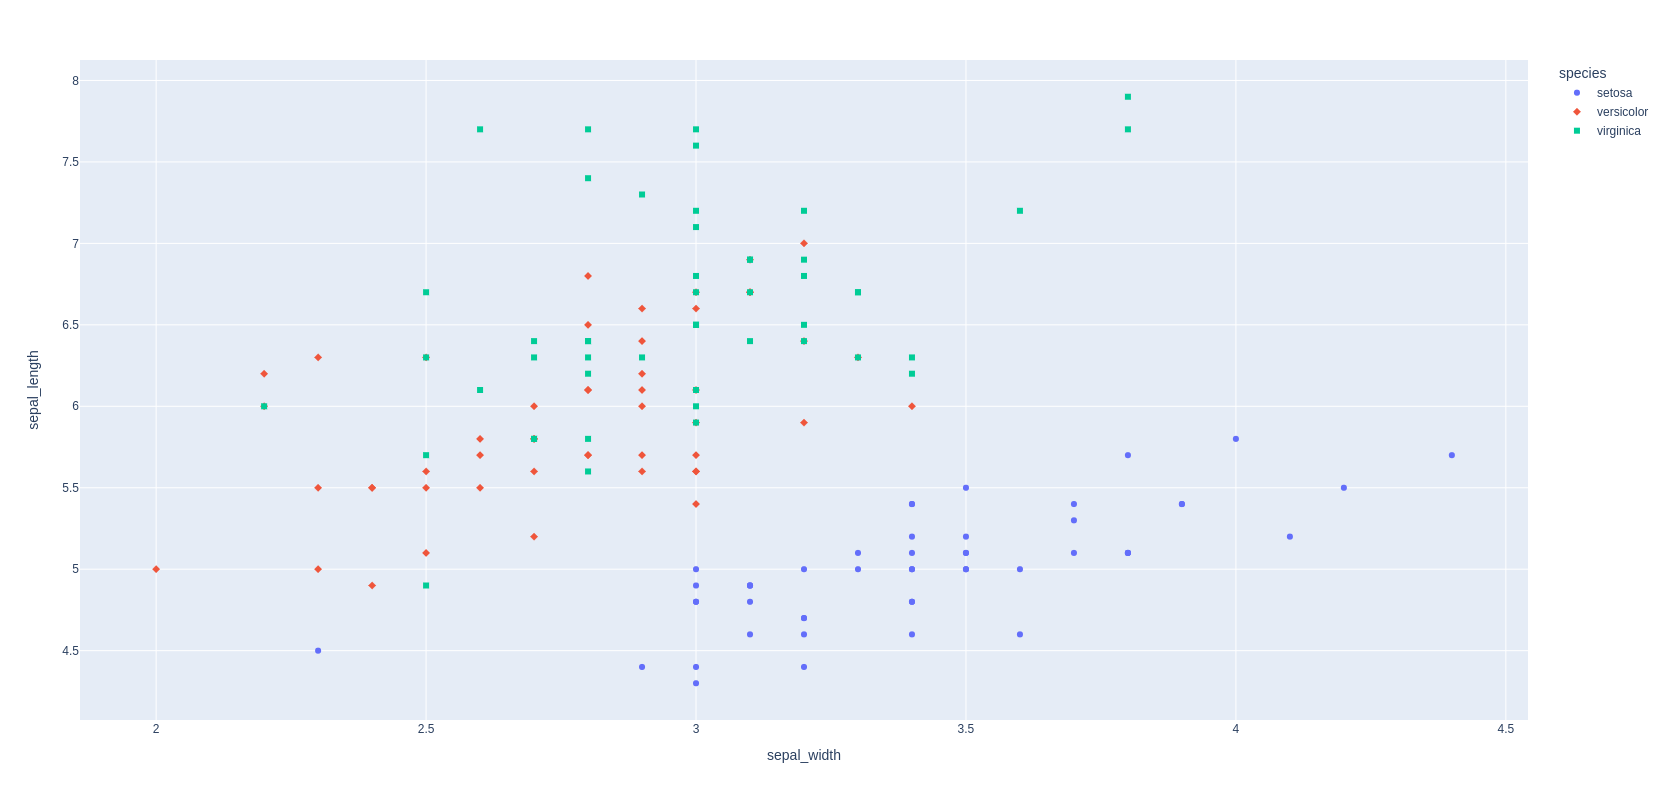

In [112]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", symbol="species", width=800, height=800)
fig.show()

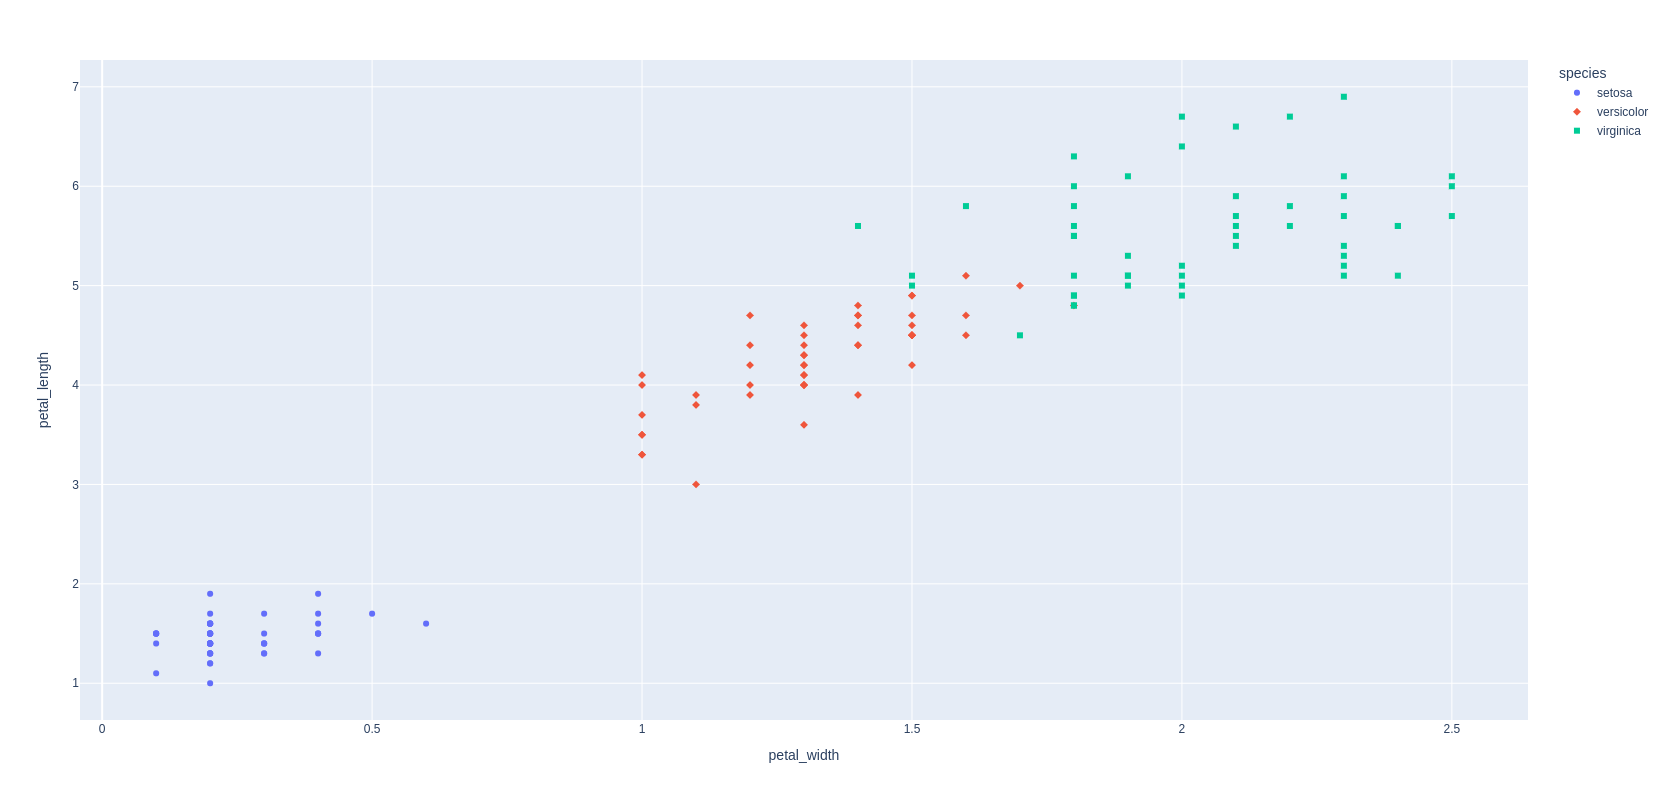

In [113]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="petal_width", y="petal_length", color="species", symbol="species", width=800, height=800)
fig.show()

<div class="alert alert-info">En observant ces deux diagrammes, quelles observations pouvez vous faire ?</div>

Essayons de représenter ces 4 dimensions sur un seul diagramme.

In [114]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x="sepal_width", y="sepal_length", z="petal_length", size="petal_width", symbol="species", color="species", width=800, height=800)
fig.show()

<div class="alert alert-info">Retrouve-t-on les mêmes observations sur ce diagramme ?</div>

Pour appliqueer notre algorithme knn il ne nous manque plus qu'une fonction qui permet de calculer la distance entre notre donnée non labélisée et chaque donnée de $E$.

## Les distances

<img src="img/distances.jpg">

Afin que l'algorithme des plus proches voisins fonctionne pour un jeu de données particulier, il est nécessaire de choisir le **type de distance** la plus appropriée pour ce jeu de données.

La **distance euclidienne** est la plus commune mais il en existe bien d'autres.

### La distance de Minkowski

La distance de Minkowski est une distance générale à partir de laquelle on peut obtenir deux types de distance.

Soient deux points A et B de coordonnées respectives $A(a_1, a_2, a_3, ....., a_n)$ et $B(b_1, b_2, b_3, ....., b_n)$

$d= (\sum_{i=1}^{n} |{{a_i - b_i}|^p})^{\frac{1}{p}}$

Ne soyez pas effrayé par cette formule, elle en fait très simple.

1. si p=1, la formule devient : $d= (\sum_{i=1}^{n} |{{a_i - b_i}|^1})^{\frac{1}{1}}$ soit $d= \sum_{i=1}^{n} |{{a_i - b_i}|}$ c'est à dire $d = |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n|$. Il s'agit ici de **la distance de Manhantan**. [Lien wikipedia](https://fr.wikipedia.org/wiki/Distance_de_Manhattan)

<figure>
   <img src="img/Manhattan_distance.svg.png"  alt="Distance de Manhattan (chemins rouge, jaune et bleu) contre distance euclidienne en vert." title="Distance de Manhattan (chemins rouge, jaune et bleu) contre distance euclidienne en vert.">
   <figcaption>Distance de Manhattan (chemins rouge, jaune et bleu) contre distance euclidienne en vert.</figcaption>
</figure>


2. si p=2, la formule devient : $d= \sum_{i=1}^{n} {{|a_i - b_i|^2}}^{\frac{1}{2}}$ soit $d = \sqrt{(\sum_{i=1}^{n} |{{a_i - b_i}|^2})}$ c'est à dire $d = \sqrt{{(a_1 - b_1)^2+ (a_2 - b_2)^2 + ... +(a_n - b_n)^2}}$. On reconnait alors la formule de la **distance euclidienne** entre deux points.


### D'autres distances

Il existe de nombreuses distances qui sont adaptées à des jeux de données spécifiques:

- La similarité cosinus : utilisée dans les problèmes financiers ou dans la recherche textuelle de similarités (détection de plagia). [Lien Wikipedia](https://fr.wikipedia.org/wiki/Similarit%C3%A9_cosinus)
- La distance de Hamming : utilisée pour la comparaison binaire de chaînes de caractères. [Lien Wikipedia](https://fr.wikipedia.org/wiki/Distance_de_Hamming)
- ...

<div class="alert alert-warning">Dans les exemples que nous traiterons nous utiliserons la <b>distance euclidienne.</b></div>

## Utilisation de scikit-learn

[scikit-learn](https://scikit-learn.org/stable/) est une bibliothèque d'intelligence artificielle.

### Importation des iris de Fisher

Cette bibliothèque possède, comme plotly, la base de données des iris de Fisher.

In [115]:
from sklearn.datasets import load_iris
iris = load_iris()
# affichage des données
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [120]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [116]:
# affichage des variables
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Affichage des especes
# 0 : setosa, 1:versicolor, 2:virginica
print(iris.target)

In [121]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [118]:
print(iris.data.shape)

(150, 4)


### Découpage en deux jeux de données

Nous allons diviser ces données en deux parties
1. une partie test : 30% des données (voir code ci-dessous)
2. Une partie apprentissage (*train*) : 70% des données


In [139]:
from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
# Observons notre jeu de tests
print(f"Les variables de test sont de la forme {X_test.shape}")
print(f"Les espèces du jeu de test sont : {y_test}")
print("Nous avons désormais un jeu d'apprentissage de 105 données et un jeu de test de 45 données.")

Les variables de test sont de la forme (45, 4)
Les espèces du jeu de test sont : [2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]
Nous avons désormais un jeu d'apprentissage de 105 données et un jeu de test de 45 données.


### Normalisation des variables

Nous avons vu que l'algorithme knn utilise une distance pour évaluer les plus proches voisins. Le problème est que souvent certaines variables possèdent des différences plus fortes que d'autres. Ces variables 'comptent' donc plus dans la distance.

Il est donc nécessaire de normaliser les variables avant d'effectuer le calcul des longueurs.

In [140]:
from sklearn.preprocessing import Normalizer

scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
normalized_X_train= scaler.transform(X_train) # the scaler is applied to the training set
normalized_X_test= scaler.transform(X_test) # the scaler is applied to the test set

print('x train before Normalization')
print(X_train[0:5])
print('\nx train after Normalization')
print(normalized_X_train[0:5])

x train before Normalization
[[4.3 3.  1.1 0.1]
 [5.7 4.4 1.5 0.4]
 [5.9 3.  4.2 1.5]
 [6.1 3.  4.6 1.4]
 [6.5 3.  5.5 1.8]]

x train after Normalization
[[0.8025126  0.55989251 0.20529392 0.01866308]
 [0.77381111 0.59732787 0.2036345  0.05430253]
 [0.73923462 0.37588201 0.52623481 0.187941  ]
 [0.73260391 0.36029701 0.55245541 0.1681386 ]
 [0.70610474 0.3258945  0.59747324 0.1955367 ]]


### Détermination de la valeur k

Avant d'utiliser l'algorithme knn il est indispensable de connaitre la valeur k que nous allons appliquer.

#### Eviter les multiples

Si les données possède deux labels, nous prendrons k impair afin de ne pas avoir d'égalité k = 2n+1

Dans notre exemple d'Iris, nous avons trois labels, nous éviterons donc les multiples de 3. Nous prendrons par exemple k = 3n + 1 (1, 4, 7, 10...)

#### Détermination par les données

Le principe est assez simple : nous allons utiliser des données dont le label est connu (notre jeu d'entrainement )et vérifier avec le jeu de test le taux d'erreur pour plusieurs valeurs de k.

#### Utilisation de l'algorithme knn


In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores = {}
for k in range(1, 30, 3):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(normalized_X_train, y_train)
    y_prediction = knn.predict(normalized_X_test)
    scores[k] = metrics.accuracy_score(y_test, y_prediction)
print(scores)


{1: 0.9777777777777777, 4: 0.9777777777777777, 7: 0.9333333333333333, 10: 0.9555555555555556, 13: 0.9555555555555556, 16: 0.9777777777777777, 19: 0.9777777777777777, 22: 0.9777777777777777, 25: 0.9777777777777777, 28: 0.9777777777777777}


Affichons les scores sous forme graphique

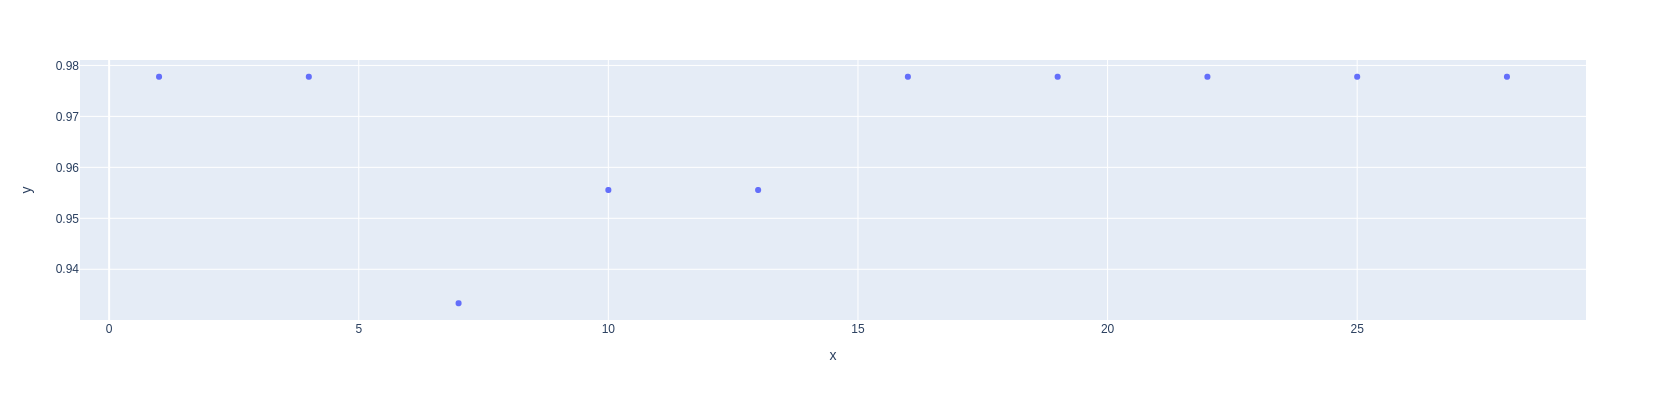

In [142]:
fig = px.scatter(x = scores.keys(), y = scores.values(), width=400, height=400)
fig.show()

<div class="alert alert-warning">Nous prenons le plus petit k qui donne les meilleurs résultats.</div>

### Prédictions

Ajoutons une donnée sans label dans notre base et visualisons la.



In [143]:
import pandas as pd


unknown_value = {"sepal_width":[3,],
                         "sepal_length":[6,],
                         "petal_length":[4.8,],
                         "petal_width":[1.6,],
                         "species":['unknown'],
                         "species_id":[4,],                        
                        }

# On ajoute une nouvelle donnée de classe inconnue
df1 = df = pd.DataFrame(unknown_value)

df2 = px.data.iris()
# On concatene les 2 dataframe
df3 = pd.concat([df2, df1], ignore_index=True)
fig = px.scatter_3d(df3, x="sepal_width", y="sepal_length", z="petal_length", size="petal_width", symbol="species", color="species", width=800, height=800)
fig.show()


<div class="alert alert-warning">En vous inspirant du code de l'entrainement, ecrire une fonction prediction(dico) qui retourne la prediction d'appartenance à une des trois espèces d'iris.></div>

## Webographie

- https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html
- https://towardsdatascience.com/knn-in-python-835643e2fb53
- https://medium.com/analytics-vidhya/titanic-machine-learning-by-k-nearest-neighbors-knn-algorithm-530d8bdd8323
- https://deepnote.com/@ndungu/Implementing-KNN-Algorithm-on-the-Iris-Dataset-e7c16493-500c-4248-be54-9389de603f16

## TP Titanic

[TP Titanic](../TPs/Titanic.ipynb)

Recupération de données sur le web : https://gist.github.com/curran/a08a1080b88344b0c8a7#file-iris-csv

https://snap.stanford.edu/